<a href="https://colab.research.google.com/github/Ayush-Tibrewal/IDENTITY_CARD/blob/main/IDENTIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytesseract
!pip install colorama
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 18 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (13.9 MB/s)
debconf: unable to init

In [3]:
data ='/content/drive/MyDrive/identification'

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import save_model
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model

In [5]:
class_labels = ["Aadhaar", "PAN", "DTU_ID",]

In [6]:
def preprocess_images(folder_path):
    images = []
    labels = []
    for i, label in enumerate(class_labels):
        folder = os.path.join(folder_path, label)
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None and img.size != 0:  # Check for valid image size
                img = cv2.resize(img, (224, 224))
                img = img / 255.0
                images.append(img)
                labels.append(i)

    return np.array(images), np.array(labels)
images, labels = preprocess_images('/content/drive/MyDrive/identification')

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# # Build the CNN model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(len(class_labels), activation='softmax'))
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_labels), activation='softmax'))

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Compile and train the model with data augmentation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_test, y_test))


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

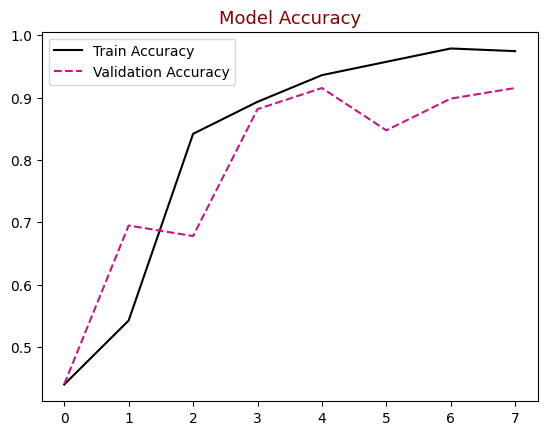

In [47]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train Accuracy",color="black")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Accuracy",color="darkred",size=13)
plt.legend()
plt.show()

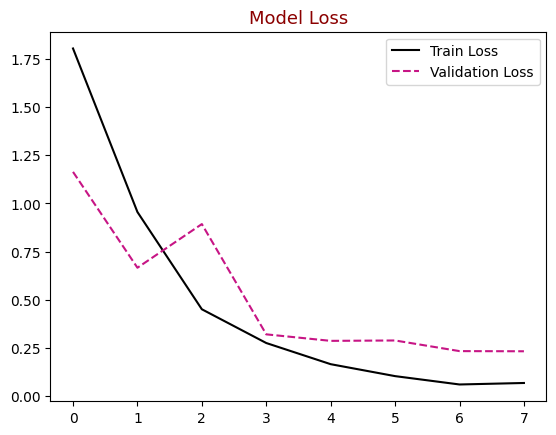

In [48]:
plt.figure()
plt.plot(history.history["loss"],label="Train Loss",color="black")
plt.plot(history.history["val_loss"],label="Validation Loss",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Loss",color="darkred",size=13)
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Save the trained model
model.save("image_classifier_model_DTU_ID.h5")

In [39]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/image_classifier_model_DTU_ID.h5")

In [ ]:
!pip install opencv
import numpy as np

In [40]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add an extra dimension for batch size
    return img

# CLASSIFICATION AND TEST EXTRACTION OF AADHAR CARD

In [148]:
# Path to the input image you want to predict
input_image_path = "/content/drive/MyDrive/identification/Aadhaar/6.jpg"

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions on the input image
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 81ms/step
Predicted Class: Aadhaar


Aadhar number is: 1990 5512 9932 1875 


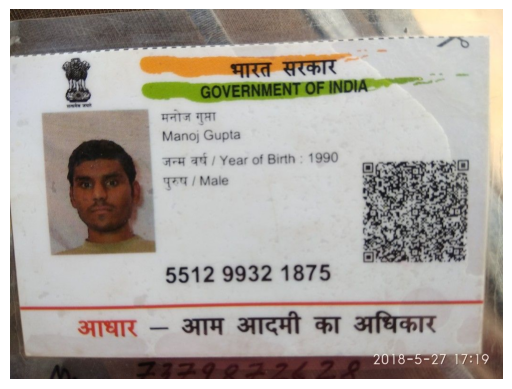

{'Name': ' Manoj Gupta', 'DOB': 'rofB/rth', 'Document Number': '1990 5512 9932 1875 ', 'Sex': 'MALE', 'Document Type': 'Aadhaar'}


In [149]:
if predicted_class == "PAN":
    ExtractDetails(input_image_path)
elif predicted_class == "Aadhaar":
    result = adhaar_read_data(input_image_path)
    print(result)
else:
    result=college_id_card_read_data(input_image_path)
    plt.imshow(image)
    print(result)

# CLASSIFICATION OF AADHAR AND TEXT EXTRACTION

In [135]:
# Path to the input image you want to predict
input_image_path = "/content/drive/MyDrive/WhatsApp Image 2023-10-24 at 12.28.03.jpeg"

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions on the input image
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 49ms/step
Predicted Class: DTU_ID


{'Name': 'AYUSH TIBREWAL', 'rollno': '/B4/26', 'Document Type': 'College ID Card', 'Image Path': '/content/drive/MyDrive/WhatsApp Image 2023-10-24 at 12.28.03.jpeg'}


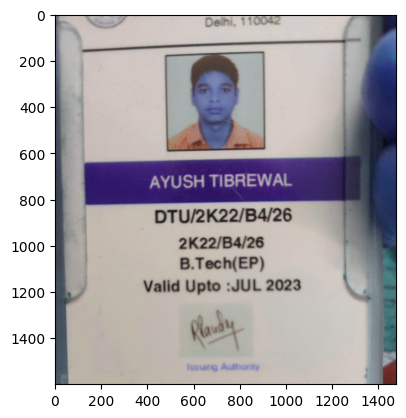

In [147]:
if predicted_class == "PAN":
    ExtractDetails(input_image_path)
elif predicted_class == "Aadhaar":
    result = adhaar_read_data(input_image_path)
    print(result)
else:
    result=college_id_card_read_data(input_image_path)
    plt.imshow(image)
    print(result)

# CLASSIFICATION OF AND EXTRACTION OF PAN CARD

In [150]:
# Path to the input image you want to predict
input_image_path = "/content/drive/MyDrive/identification/PAN/1.jpg"

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions on the input image
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 49ms/step
Predicted Class: PAN


Pan Card Number :  GQBPK8700C
DATE OF BIRTH :    04/05/1997


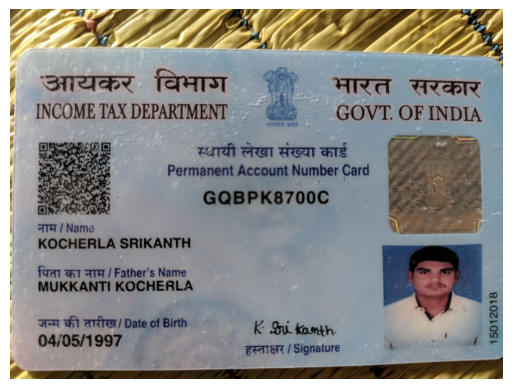

In [151]:
if predicted_class == "PAN":
    ExtractDetails(input_image_path)
elif predicted_class == "Aadhaar":
    result = adhaar_read_data(input_image_path)
    print(result)
else:
    result=college_id_card_read_data(input_image_path)
    plt.imshow(image)
    print(result)

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
#Tesseract Library
import pytesseract

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

### Make prettier the prints ###
from colorama import Fore, Style
c_ = Fore.CYAN
m_ = Fore.MAGENTA
r_ = Fore.RED
b_ = Fore.BLUE
y_ = Fore.YELLOW
g_ = Fore.GREEN
w_ = Fore.WHITE

import warnings
warnings.filterwarnings(action='ignore')

In [119]:
def ExtractDetails(image_path):
    text = pytesseract.image_to_string(Image.open(image_path), lang = 'eng')
    text = text.replace("\n", " ")
    text = text.replace("  ", " ")
    regex_DOB = re.compile('\d{2}[-/]\d{2}[-/]\d{4}')
    regex_num = re.compile('[A-Z]{5}[0-9]{4}[A-Z]{1}')

    image = cv2.imread(os.path.join(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")

    if len(regex_num.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing pan card number !!!')
        print(Style.RESET_ALL)
    else:
        print("Pan Card Number : ", regex_num.findall(text)[0])

    print('=================================')

    if len(regex_DOB.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing DATE OF BIRTH !!!')
        print(Style.RESET_ALL)
    else:
        print("DATE OF BIRTH :   ", regex_DOB.findall(text)[0])

    print('=================================')

In [ ]:
import pytesseract
from PIL import Image
import re
import cv2
import matplotlib.pyplot as plt

def adhaar_read_data(image_path):
    # Load the image
    img = Image.open(image_path)

    # Use Tesseract to extract text from the image
    text = pytesseract.image_to_string(img)

    res = text.split()
    name = None
    dob = None
    adh = None
    sex = None
    add = None

    nameline = []
    dobline = []
    addline = []

    text0 = []
    text1 = []
    text2 = []
    lines = text.split('\n')
    for lin in lines:
        s = lin.strip()
        s = lin.replace('\n', '')
        s = s.rstrip()
        s = s.lstrip()
        text1.append(s)

    if 'female' in text.lower():
        sex = "FEMALE"
    else:
        sex = "MALE"

    text1 = list(filter(None, text1))
    text0 = text1[:]

    try:
        # Cleaning first names
        name = text0[0]
        name = name.rstrip()
        name = name.lstrip()
        name = name.replace("8", "B")
        name = name.replace("0", "D")
        name = name.replace("6", "G")
        name = name.replace("1", "I")
        name = re.sub(r'[^a-zA-Z]+', ' ', name)

        # Cleaning DOB
        dob = text0[1][-10:]
        dob = dob.rstrip()
        dob = dob.lstrip()
        dob = dob.replace('l', '/')
        dob = dob.replace('L', '/')
        dob = dob.replace('I', '/')
        dob = dob.replace('i', '/')
        dob = dob.replace('|', '/')
        dob = dob.replace('\"', '/1')
        dob = dob.replace(":", "")
        dob = dob.replace(" ", "")

        # Cleaning Adhaar number details
        aadhar_number = ''
        for word in res:
            if len(word) == 4 and word.isdigit():
                aadhar_number = aadhar_number + word + ' '
        if len(aadhar_number) >= 14:
            print("Aadhar number is: " + aadhar_number)
        else:
            print("Aadhar number not read")
        adh = aadhar_number

        # Cleaning address
        text0 = findword(text1, r'(Address|Adress|ddress|Addess|Addrss|Addres|Add|Ad|Location)$')
        addline = text0[0]
        add = addline.rstrip()
        add = add.lstrip()
        add = add.replace(" ", "")
        add = add.replace("\"", "")
        add = add.replace(";", "")
        add = add.replace("%", "L")
    except:
        pass

    data = {
        'Name': name,
        'DOB': dob,
        'Document Number': adh,
        'Sex': sex,
        'Document Type': "Aadhaar"
    }

    # Display the image
    img_cv = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Define the order of the keys
    output_order = ["Name", "DOB", "Document Number", "Sex", "Document Type"]

    # Format the output dictionary in the specified order
    ordered_data = {key: data[key] for key in output_order}

    return ordered_data

def findword(textlist, wordstring):
    lineno = -1
    for wordline in textlist:
        xx = wordline.split()
        if any(re.search(wordstring, w) for w in xx):
            lineno = textlist.index(wordline)
            textlist = textlist[lineno+1:]
            return textlist
    return textlist

# Example usage
image_path = '/content/drive/MyDrive/identification/Aadhaar/57.jpg'
result = adhaar_read_data(image_path)

# Print the information in the specified order
for key, value in result.items():
    print(f"{key}: {value}")


In [32]:
def extract_text_from_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
    text = pytesseract.image_to_string(threshed, lang="eng")
    return text

In [144]:
def college_id_card_read_data(image_path):
    # Open the image using the provided image_path
    college_id_img = Image.open(image_path)

    # Perform OCR to extract text from the image
    college_id_text = pytesseract.image_to_string(college_id_img, lang="eng")

    text1 = []
    full_name = ""
    rollno = ""

    lines = college_id_text.split('\n')
    for lin in lines:
        s = lin.strip()
        s = lin.rstrip()
        s = s.lstrip()
        text1.append(s)

    # Modify regular expressions to match your college ID card's structure
    full_name = findword(text1, r'^([A-Za-z ]+)$')
    rollno = findword(text1, r'^VALID UPTO:(.*)$')

    # Handle None values

    if full_name:
        full_name = full_name[0].strip()
    if rollno:
        rollno = rollno[0].strip()

    # Converting the extracted information into a dictionary
    data = {

        'Name': full_name,
        'rollno': '2K/',
        'Document Type': "College ID Card",
        'Image Path': image_path  # Include the image path in the result
    }
    return data


In [ ]:
import cv2
import pytesseract
import re

def college_id_card_read_data(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)

    # Perform OCR on the image to extract text
    text = pytesseract.image_to_string(img)

    text1 = []

    roll_number = ""
    full_name = ""
    dob = ""

    lines = text.split('\n')
    for lin in lines:
        s = lin.strip()
        s = lin.rstrip()
        s = s.lstrip()
        text1.append(s)

    # Updated regular expression pattern to extract roll number
    roll_number = findword(text1, r'(DTU/\d{4}/[A-Z]{1,2}/\d{2})')
    full_name = findword(text1, r'^([A-Za-z ]+)$')

    # Handle None values
    if roll_number:
        roll_number = roll_number[0].strip()
    if full_name:
        full_name = full_name[0].strip()

    # Converting the extracted information into a dictionary
    data = {
        'Roll Number': roll_number,
        'Name': full_name,
        'Document Type': "College ID Card"
    }

    return data, img

def findword(textlist, wordstring):
    for wordline in textlist:
        match = re.search(wordstring, wordline)
        if match:
            return [match.group(1) if match.group(1) else match.group(0)]

# Example usage:
result, image = college_id_card_read_data('/content/drive/MyDrive/WhatsApp Image 2023-10-24 at 12.28.03.jpeg')

cv2.imwrite('result_image.jpg', image)


# YOLO_MODEL FOR AADHAR

In [49]:
%cd  /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
pip install easyocr

In [56]:
import cv2
import numpy as np
import glob
import random
import easyocr
reader = easyocr.Reader(['en'])

# Load Yolo
net = cv2.dnn.readNet("yolov3last2.weights", "yolov3.cfg")

# Name custom object
classes = ["name",'dob','gender','aadhar_no']

# Images path
images_path = glob.glob('identification/Aadhaar/10.jpg')


layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.25:
                # Object detected
                # print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    # print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            x=x-2
            y=y-4
            h=h+5
            w=w+5

            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            # cv2.putText(img, label, (x, y + 30), font, 3, color, 2)

            crop = img[y:y+h, x:x+w]

            # cv2.imshow("temp", crop)
            # key = cv2.waitKey(0)

            result = reader.readtext(crop,detail=0)
            print(result)
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)


    key = cv2.waitKey(0)

cv2.destroyAllWindows()